# EDA + Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
losses = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-losses.csv")
risk = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-risk.csv")
spec = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/Automobile-20190826T224011Z-001/Automobile/automobile-spec.csv")

In [3]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [4]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [5]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Part 1

### 1. Join 3 tables using ID as key

In [6]:
losses_risk = pd.merge(losses,risk, how ='left', on = 'ID')
losses_risk.head()

,ID,normalized-losses,symboling
0,1,NaN,3
1,2,NaN,3
2,3,NaN,1
3,4,164.0,2
4,5,164.0,2


In [7]:
df = pd.merge(losses_risk, spec, how ='left', on = 'ID')
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2. Quick-look

In [8]:
#dimension
df.shape

(205, 27)

In [9]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [10]:
#top of data
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
df.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Identify missing value

In [12]:
df.isnull().sum()

ID                    0
normalized-losses    41
symboling             0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Berdasarkan pengecekan di atas, terdapat missing value pada beberapa variabel sehingga dilakukan imputasi menggunakan modus untuk data kategori dan median untuk data numerik.

In [13]:
mmodus = ['num-of-doors']
for feature in mmodus:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

mmedian = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for feature in mmedian:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].median())

In [14]:
df.isnull().sum()

ID                   0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Setelah dilakukan imputasi, tidak ada missing value pada seluruh data.

### 4. Perform visualization

#### a. Barchart

In [15]:
top_10=df.sort_values('price',ascending=False).head(10)
top_10

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,75,115.0,1,mercedes-benz,gas,std,two,hardtop,rwd,front,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,17,115.0,0,bmw,gas,std,two,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,74,115.0,0,mercedes-benz,gas,std,four,sedan,rwd,front,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,129,115.0,3,porsche,gas,std,two,convertible,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,18,115.0,0,bmw,gas,std,four,sedan,rwd,front,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
49,50,115.0,0,jaguar,gas,std,two,sedan,rwd,front,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
48,49,115.0,0,jaguar,gas,std,four,sedan,rwd,front,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
72,73,142.0,3,mercedes-benz,gas,std,two,convertible,rwd,front,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
71,72,115.0,-1,mercedes-benz,gas,std,four,sedan,rwd,front,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
127,128,115.0,3,porsche,gas,std,two,hardtop,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0


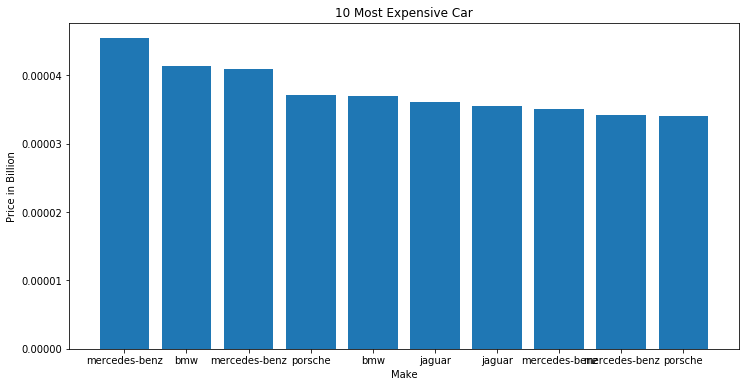

In [16]:
plt.figure(figsize=(12,6))

x=range(10)
plt.bar(x,top_10['price']/10**9)
plt.xticks(x,top_10['make'])
plt.xlabel('Make')
plt.ylabel('Price in Billion')
plt.title('10 Most Expensive Car')
plt.show()

#### b. Pie Chart

In [17]:
top_10["body-style"].value_counts()

sedan          6
convertible    2
hardtop        2
Name: body-style, dtype: int64

In [18]:
piechart = {'body-style':['sedan', 'hardtop', 'convertible'],
            'count':[6,2,2]}
piechart = pd.DataFrame(piechart)
piechart

,body-style,count
0,sedan,6
1,hardtop,2
2,convertible,2


Wedges:  [<matplotlib.patches.Wedge object at 0x000002236DAC93C8>, <matplotlib.patches.Wedge object at 0x000002236DAC9B38>, <matplotlib.patches.Wedge object at 0x000002236DAD3320>]
Texts:  [Text(-0.339919,1.04616,'sedan'), Text(-0.339919,-1.04616,'hardtop'), Text(0.889919,-0.646564,'convertible')]
Autotexts:  [Text(-0.18541,0.570634,'60.00'), Text(-0.18541,-0.570634,'20.00'), Text(0.48541,-0.352671,'20.00')]


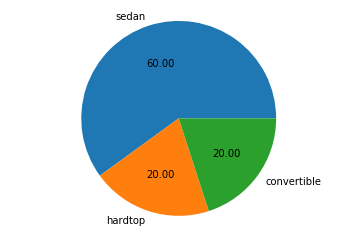

In [19]:
wedges, texts, autotexts = plt.pie(piechart['count'], 
                                    labels=piechart['body-style'],
                                    autopct='%.2f')

plt.axis('equal')

print('Wedges: ', wedges)
print('Texts: ', texts)
print('Autotexts: ', autotexts)

#### c. Scatterplot

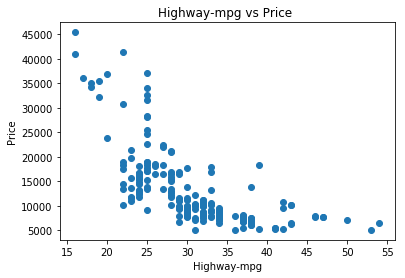

In [20]:
plt.scatter(df['highway-mpg'],df['price'])
plt.title('Highway-mpg vs Price ')
plt.xlabel('Highway-mpg')
plt.ylabel('Price')
plt.show()

#### d. Histogram

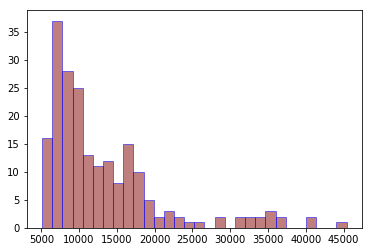

In [21]:
plt.hist(df['price'], 
         facecolor='maroon', 
         edgecolor='blue', 
         bins=30,
         alpha = 0.5)
plt.show()

#### e. Violinplot

In [22]:
df_array = np.array(df[['city-mpg', 'highway-mpg']])

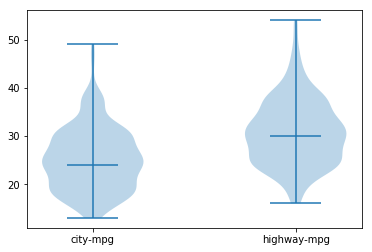

In [23]:
vp = plt.violinplot(df_array,
                    showmedians=True)

plt.xticks([1, 2], ['city-mpg', 'highway-mpg'])

plt.show()    

# Part 2

### 1. Car Brand with highest price

In [24]:
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [25]:
price_highest=df.sort_values('price',ascending=False)
price_highest[['make', 'price']].head(1)

,make,price
74,mercedes-benz,45400.0


### 2. Maximum horsepower for car with 6 cylinder engine

In [26]:
df.columns

Index(['ID', 'normalized-losses', 'symboling', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'cylinder', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [27]:
cylinder6 = df[df.cylinder == 'six']
horsepower_max = cylinder6['horsepower'].max()
print("The maximum horsepower for car with 6 cylinder engines is " + str(horsepower_max) + ".")

The maximum horsepower for car with 6 cylinder engines is 207.0.


### 3. Average peak-rpm for 'turbo' style aspiration car

In [28]:
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [29]:
asp = df[df.aspiration == 'turbo']
peak_avg = asp['peak-rpm'].mean()
print("The average peak-rpm for 'turbo' style aspiration car is " + "{:.2f}".format(peak_avg) + ".")

The average peak-rpm for 'turbo' style aspiration car is 4939.19.


### 4. Average price based on body-style

In [30]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [31]:
sedan = df[df['body-style'] == 'sedan']
hatchback = df[df['body-style'] == 'hatchback']
wagon = df[df['body-style'] == 'wagon']
hardtop = df[df['body-style'] == 'hardtop']
convertible = df[df['body-style'] == 'convertible']

avgs = sedan['price'].mean()
avghb = hatchback['price'].mean()
avgw = wagon['price'].mean()
avght = hardtop['price'].mean()
avgc = convertible['price'].mean()

bodystyle = {'body-style':['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'],
             'average of price':[avgs, avghb, avgw, avght, avgc]}
bodystyle = pd.DataFrame(bodystyle)
bodystyle

,body-style,average of price
0,sedan,14372.989583
1,hatchback,9967.085714
2,wagon,12371.960000
3,hardtop,22208.500000
4,convertible,21890.500000


### 5. Average price based on body-style only for Honda car

In [32]:
honda = df[df.make == 'honda']
honda["body-style"].value_counts()

hatchback    7
sedan        5
wagon        1
Name: body-style, dtype: int64

In [33]:
sedan = honda[honda['body-style'] == 'sedan']
hatchback = honda[honda['body-style'] == 'hatchback']
wagon = honda[honda['body-style'] == 'wagon']

avgs = sedan['price'].mean()
avghb = hatchback['price'].mean()
avgw = wagon['price'].mean()

bodystyle = {'body-style':['sedan', 'hatchback', 'wagon'],
             'average of price':[avgs, avghb, avgw]}
bodystyle = pd.DataFrame(bodystyle)
bodystyle

,body-style,average of price
0,sedan,9945.000000
1,hatchback,7054.428571
2,wagon,7295.000000


## Clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

Feature yang dipilih adalah length, width, dan height.

### K-Means

In [35]:
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    205 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-nu

In [37]:
data = df[['length', 'width', 'height']]
data.tail()

,length,width,height
200,188.8,68.9,55.5
201,188.8,68.8,55.5
202,188.8,68.9,55.5
203,188.8,68.9,55.5
204,188.8,68.9,55.5


In [38]:
X = data.values[:,0:]
X

array([[168.8,  64.1,  48.8],
       [168.8,  64.1,  48.8],
       [171.2,  65.5,  52.4],
       [176.6,  66.2,  54.3],
       [176.6,  66.4,  54.3],
       [177.3,  66.3,  53.1],
       [192.7,  71.4,  55.7],
       [192.7,  71.4,  55.7],
       [192.7,  71.4,  55.9],
       [178.2,  67.9,  52. ],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [189. ,  66.9,  55.7],
       [189. ,  66.9,  55.7],
       [193.8,  67.9,  53.7],
       [197. ,  70.9,  56.3],
       [141.1,  60.3,  53.2],
       [155.9,  63.6,  52. ],
       [158.8,  63.6,  52. ],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [174.6,  64.6,  59.8],
       [173.2,  66.3,  50.2],
       [144.6,  63.9,  50.8],
       [144.6,  63.9,  50.8],
       [150. ,  64. ,  52.6],
       [15

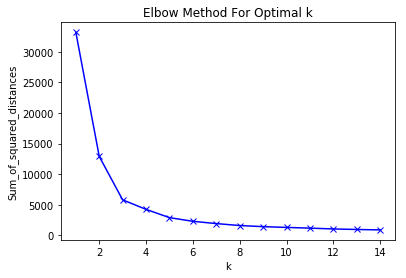

In [39]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan visualisasi di atas, k = 3

In [40]:
k_means = KMeans(init = 'k-means++', n_clusters = 3)
k_means.fit(X)
print(k_means.labels_)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 2 2 0 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 1 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0
 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
print(k_means.cluster_centers_)

[[172.16491228  65.40964912  53.17631579]
 [190.30740741  68.42222222  55.74259259]
 [156.12702703  63.77297297  52.47027027]]


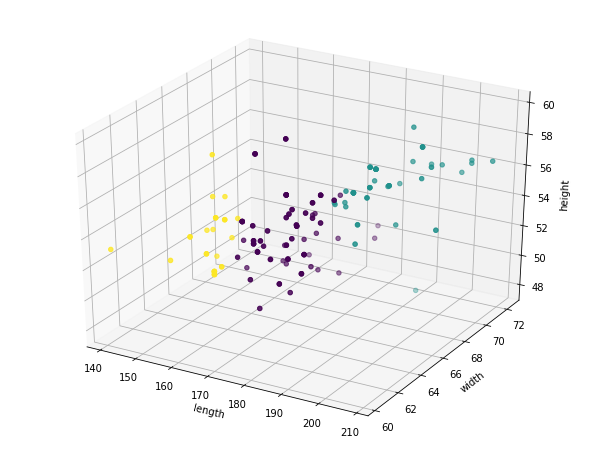

In [42]:
# Step 7 Visualisasi Hasil
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = k_means.labels_.astype(np.float))

In [43]:
# Memasukkan hasil label ke dalam suatu dataframe
data['clust_kmeans'] = pd.DataFrame(k_means.labels_)
data = data.sort_values('clust_kmeans')
data

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,length,width,height,clust_kmeans
0,168.8,64.1,48.8,0
93,170.2,63.8,53.5,0
92,165.3,63.8,54.5,0
91,165.3,63.8,54.5,0
90,165.3,63.8,54.5,0
...,...,...,...,...
98,162.4,63.8,53.3,2
33,150.0,64.0,52.6,2
32,150.0,64.0,52.6,2
30,144.6,63.9,50.8,2


In [45]:
data['clust_kmeans'].value_counts()

0    114
1     54
2     37
Name: clust_kmeans, dtype: int64

In [ ]:
#observasi mana aja yg clusternya 0
clus0 = data['cluster'] == 0
clus0.rows

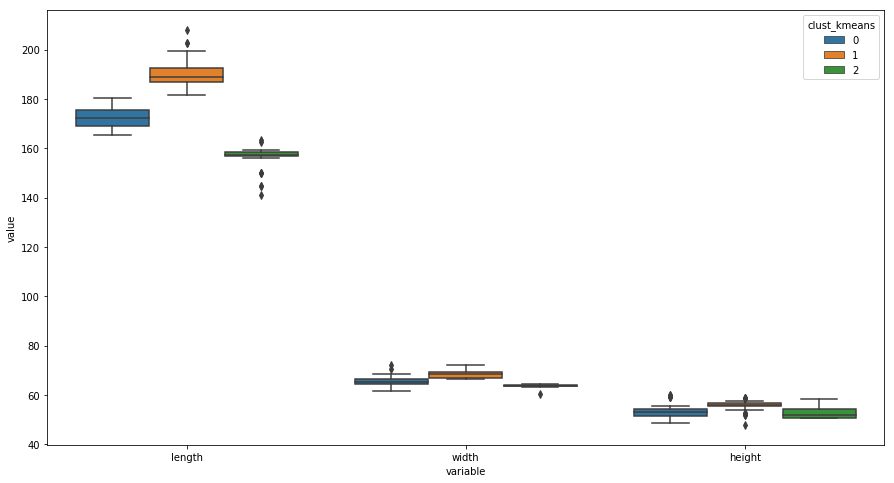

In [47]:
dff2=pd.melt(data,id_vars='clust_kmeans')
sns.boxplot(y="value", x="variable", hue='clust_kmeans', data=dff2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan hasil k-means, didapatkan bahwa cluster 0 merupakan observasi dengan nilai length, width, dan height yang rendah, cluster 1 merupakan observasi dengan nilai length, width, dan height yang sedang, dan cluster 2 merupakan observasi dengan nilai length, width, dan height yang tinggi.

### Hierarchical Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### Ward

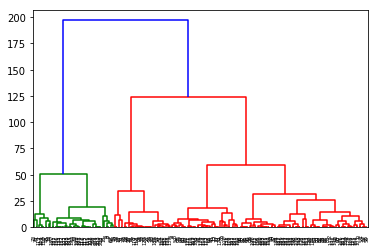

In [49]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [100]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labelw = model.labels_

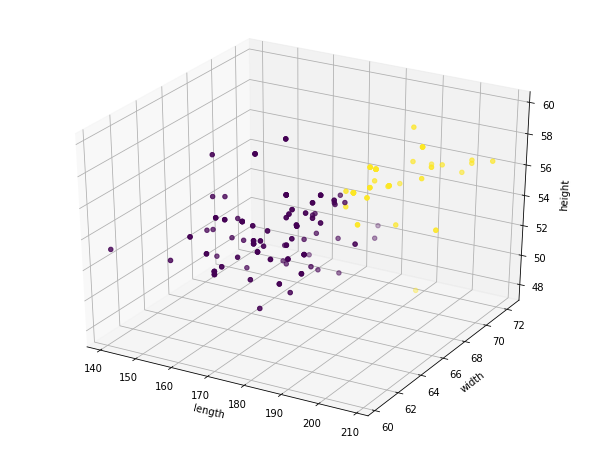

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = labelw.astype(np.float))

Berdasarkan visualisasi di atas, data terdiri dari 2 cluster di mana cluster pertama merupakan data dengan observasi yang  nilai length, width, dan height yang rendah, dan cluster kedua merupakan observasi dengan nilai length, width, dan height yang tinggi.

In [103]:
# Memasukkan hasil label ke dalam suatu dataframe
data['cluster_ward'] = pd.DataFrame(labelw)
data = data.sort_values('cluster_ward')
data

,length,width,height,clust_kmeans,cluster_ward,cluster_sl
33,150.0,64.0,52.6,2,0,0
106,178.5,67.9,49.7,0,0,0
75,178.4,68.0,54.8,0,0,0
122,167.3,63.8,50.8,0,0,0
139,157.9,63.6,53.7,2,0,0
...,...,...,...,...,...,...
16,193.8,67.9,53.7,1,1,0
134,186.6,66.5,56.1,1,1,0
6,192.7,71.4,55.7,1,1,0
107,186.7,68.4,56.7,1,1,0


#### Single Linkage

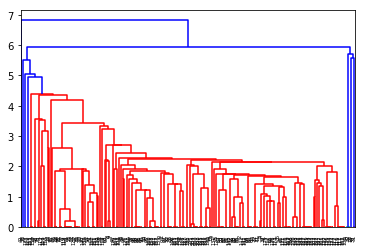

In [104]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [105]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(X)
labelsl = model.labels_

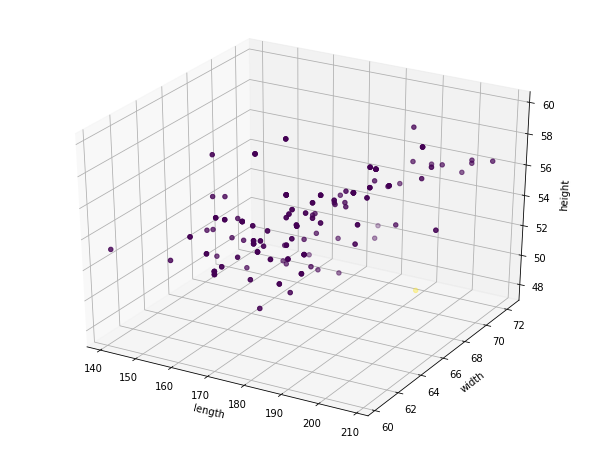

In [106]:
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = labelsl.astype(np.float))

Berdasarkan visualisasi di atas, data terdiri dari 2 cluster di mana cluster pertama merupakan data dengan observasi yang  nilai length, width, dan height yang rendah, dan cluster kedua merupakan observasi dengan nilai length, width, dan height yang tinggi. Cluster kedua tidak terlalu terlihat karena berwana kuning dan jumlah yang sedikit.

In [107]:
# Memasukkan hasil label ke dalam suatu dataframe
data['cluster_sl'] = pd.DataFrame(labelsl)
data = data.sort_values('cluster_sl')
data

,length,width,height,clust_kmeans,cluster_ward,cluster_sl
33,150.0,64.0,52.6,2,0,0
154,169.7,63.6,59.1,0,0,0
88,172.4,65.4,51.6,0,0,0
162,166.3,64.4,52.8,0,0,0
87,172.4,65.4,51.6,0,0,0
...,...,...,...,...,...,...
127,168.9,65.0,51.6,0,0,0
125,168.9,68.3,50.2,0,0,0
124,173.2,66.3,50.2,0,0,0
128,168.9,65.0,51.6,0,0,0


#### Average Linkage

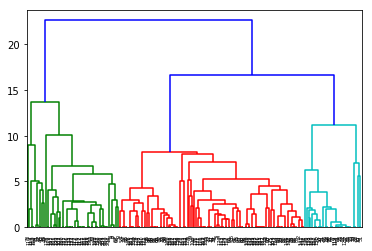

In [108]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [113]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_

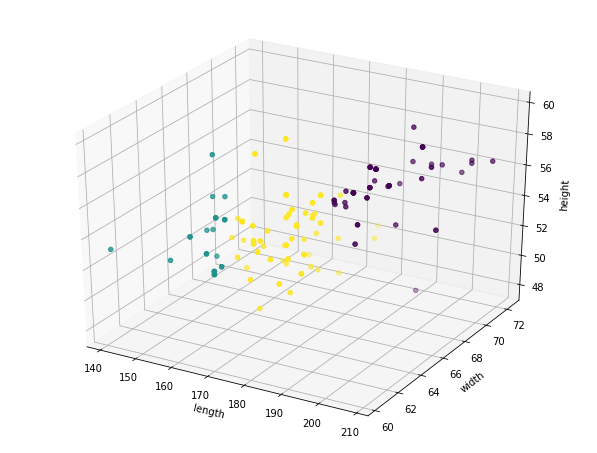

In [114]:
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = labels.astype(np.float))

Berdasarkan hasil k-means, didapatkan bahwa cluster 0 merupakan observasi dengan nilai length, width, dan height yang rendah, cluster 1 merupakan observasi dengan nilai length, width, dan height yang sedang, dan cluster 2 merupakan observasi dengan nilai length, width, dan height yang tinggi.

In [115]:
# Memasukkan hasil label ke dalam suatu dataframe
data['cluster_al'] = pd.DataFrame(labels)
data = data.sort_values('cluster_al')
data

,length,width,height,clust_kmeans,cluster_ward,cluster_sl,cluster_al
49,191.7,70.6,47.8,1,1,1,0
199,188.8,67.2,57.5,1,1,0,0
111,186.7,68.4,56.7,1,1,0,0
135,186.6,66.5,56.1,1,1,0,0
115,186.7,68.4,56.7,1,1,0,0
...,...,...,...,...,...,...,...
123,174.6,64.6,59.8,0,0,0,2
99,173.4,65.2,54.7,0,0,0,2
100,173.4,65.2,54.7,0,0,0,2
184,171.7,65.5,55.7,0,0,0,2


#### Complete Linkage

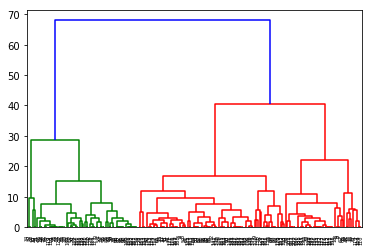

In [116]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [117]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

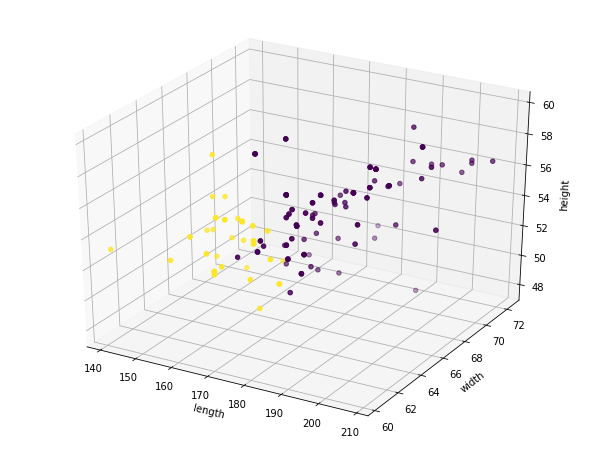

In [118]:
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = labels.astype(np.float))

Berdasarkan visualisasi di atas, data terdiri dari 2 cluster di mana cluster pertama merupakan data dengan observasi yang  nilai length, width, dan height yang rendah, dan cluster kedua merupakan observasi dengan nilai length, width, dan height yang tinggi.

In [119]:
# Memasukkan hasil label ke dalam suatu dataframe
data['cluster_cl'] = pd.DataFrame(labels)
data = data.sort_values('cluster_cl')
data

,length,width,height,clust_kmeans,cluster_ward,cluster_sl,cluster_al,cluster_cl
49,191.7,70.6,47.8,1,1,1,0,0
64,177.8,66.5,55.5,0,0,0,2,0
4,176.6,66.4,54.3,0,0,0,2,0
3,176.6,66.2,54.3,0,0,0,2,0
124,173.2,66.3,50.2,0,0,0,2,0
...,...,...,...,...,...,...,...,...
152,158.7,63.6,54.5,2,0,0,1,1
25,157.3,63.8,50.6,2,0,0,1,1
119,157.3,63.8,50.8,2,0,0,1,1
1,168.8,64.1,48.8,0,0,0,2,1


### DBSCAN

In [120]:
from sklearn.cluster import DBSCAN
data.head()

,length,width,height,clust_kmeans,cluster_ward,cluster_sl,cluster_al,cluster_cl
49,191.7,70.6,47.8,1,1,1,0,0
64,177.8,66.5,55.5,0,0,0,2,0
4,176.6,66.4,54.3,0,0,0,2,0
3,176.6,66.2,54.3,0,0,0,2,0
124,173.2,66.3,50.2,0,0,0,2,0


In [121]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [122]:
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0
  0  0  0  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  1  1  2  2  2  2  3  3  3  3 -1  3 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  4 -1 -1  4  4 -1 -1  4  4 -1  0  0
  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  6  6  6  6  6  6 -1 -1 -1 -1  7
  7  7  7  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8  8  8  8  8  8  8 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  9  9  9  9  9]


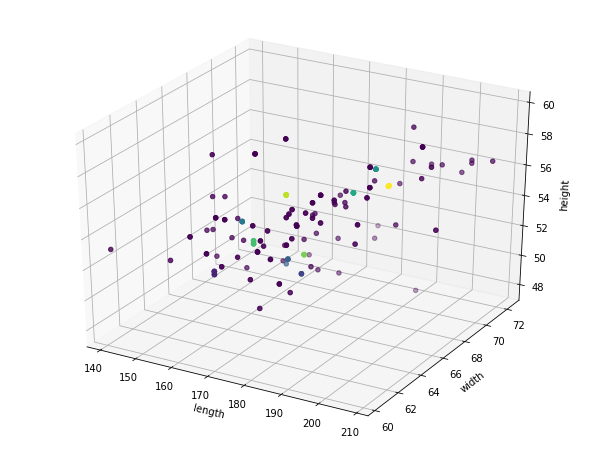

In [124]:
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')

ax.scatter(X[:,0], X[:, 1], X[:, 2], c = dbscan.labels_.astype(np.float))

Berdasarkan visualisasi di atas, data terbagi menjadi 10 klaster dengan sejumlah noise.

In [125]:
# Memasukkan hasil label ke dalam suatu dataframe
data['cluster_dbscan'] = pd.DataFrame(labels)
data = data.sort_values('cluster_dbscan')
data

,length,width,height,clust_kmeans,cluster_ward,cluster_sl,cluster_al,cluster_cl,cluster_dbscan
49,191.7,70.6,47.8,1,1,1,0,0,0
179,183.5,67.7,52.0,1,0,0,0,0,0
7,192.7,71.4,55.7,1,1,0,0,0,0
74,199.2,72.0,55.4,1,1,0,0,0,0
47,199.6,69.6,52.8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
54,166.8,64.2,54.1,0,0,0,2,1,1
36,157.1,63.9,58.3,2,0,0,1,1,1
21,157.3,63.8,50.8,2,0,0,1,1,1
94,165.3,63.8,54.5,0,0,0,2,1,1


Clustering pada data ini dilakukan dengan metode kmeans, single linkage, complete linkage, average linkage, dan DBSCAN. Algoritma yang paling cocok dipilih adalah kmeans karena hasilnya dapat menghasilkan segmentasi observasi yang jelas dan mudah dimengerti.